In [1]:
import os
import numpy as np
import datetime as DT

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Set pandas printout options, for better look
pd.set_option('display.max_row', 15)
pd.set_option('display.max_columns', 15)
pd.set_option('expand_frame_repr', False)
pd.set_option('max_colwidth', 60)

## Set train data root path
root_path = os.path.abspath(os.path.join(os.path.dirname('__file__'), '../..'))

df = pd.read_csv()

## Change birthdate format, so we can calculate age of every related id
df['birthdate'] = df['birthdate'].apply('{:06}'.format)
df['birthdate'] = pd.to_datetime(df['birthdate'], format='%m%d%y')

rep_var=['','N-A'] #variable replace

## Clear all NaN Value, so become more readable
df = df.replace(np.nan, rep_var[1], regex=True)

## Create new copy of prior DataFrame and
##  Select only appropriate column
##    and filter empty `topic_id`
df_filter = df.loc[(df['topic_id'] != '') & (df['city'] != '') & (df['os'] != ''), \
    ['user_id','gender','birthdate','event','event_time','city','browser','os','device'\
    ,'carrier','manufacturer','duration','topic_id','article_id']]

now = pd.Timestamp(DT.datetime.now())

## Calculate Age, by subtracting variable now(which is current date) and birtdate
df_filter['birthdate'] = df_filter['birthdate'].where(df_filter['birthdate'] < now, df_filter['birthdate'] -  np.timedelta64(100, 'Y'))
df_filter['birthdate'] = (now - df_filter['birthdate']).astype('<m8[Y]')

df_filter.head(5) # get top 5

/root/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,gender,birthdate,event,event_time,city,browser,os,device,carrier,manufacturer,duration,topic_id,article_id
0,1026349329,male,21.0,read_article,2017-03-07 06:56:59,Jakarta,N-A,Android,N-A,TELKOMSEL,OnePlus,N-A,"22553543,522681656,41566010,46170458,1027266267",1028322564
1,1035461267,male,28.0,read_article,2017-04-26 21:14:18,Surabaya,Chrome,Android,Android,N-A,N-A,N-A,"143865906,27432949,98040676,52353894,1035581805",1036034482
2,701987221,male,62.0,article_comment,2017-05-23 18:07:11,Jakarta,N-A,Android,N-A,TELKOMSEL,LENOVO,N-A,N-A,N-A
3,771752788,male,25.0,spent_time,2017-02-23 07:43:15,Jakarta,N-A,Android,N-A,TELKOMSEL,samsung,N-A,"361858614,46904429,91265302,27428266",1009162668
4,765731006,female,21.0,spent_time,2017-03-10 19:45:39,Jakarta,N-A,Android,N-A,TELKOMSEL,OPPO,N-A,N-A,1032594876


* * *

## All unique user_id x OS

In [5]:
## Get simple data summary
df_os_unique = df_filter[['user_id','os']].loc[df_filter['os']!='N-A'].groupby(['user_id','os']).size().to_frame()
df_os_unique.index.names=['user_id','os']
df_os_unique.reset_index(inplace=True)
df_os_unique = df_os_unique.rename(columns={0: 'count'})

print df_os_unique['os'].describe(),"\n"
print df_os_unique.groupby('os').size()

count       12241
unique          8
top       Android
freq         7842
Name: os, dtype: object 

os
Android          7842
BlackBerry         17
Linux              68
Mac OS X          307
Windows          2852
Windows Phone      43
iOS              1062
iPhone OS          50
dtype: int64


In [3]:
## How many times selected OS used by user_id every time he/she online
df_filter['os'].value_counts()

Android          284478
Windows          103907
iOS               72949
Mac OS X          55941
Linux              6193
iPhone OS          2807
Windows Phone       877
N-A                 226
BlackBerry           53
Name: os, dtype: int64

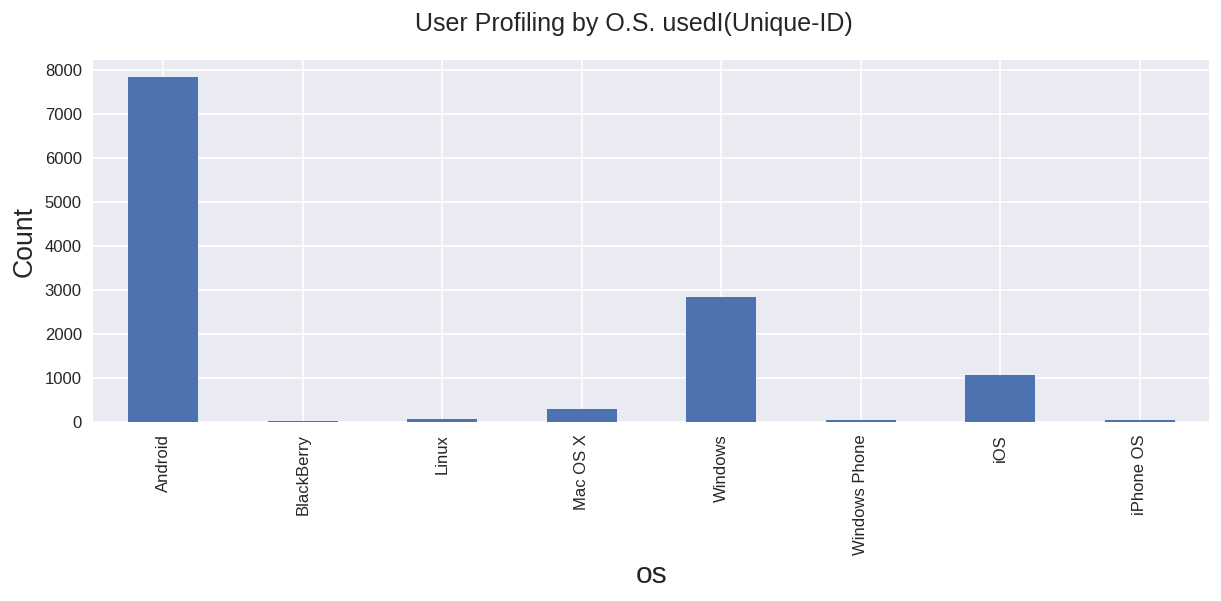

In [6]:
figos = plt.figure(figsize=(12, 4), dpi=120, facecolor='w', edgecolor='k')

figos.suptitle('User Profiling by O.S. usedI(Unique-ID)', fontsize=15)
plt.xlabel('O.S.', fontsize=18)
plt.ylabel('Count', fontsize=16)

df_os_unique.groupby(['os']).size().plot(kind='bar')

plt.show()

## All unique user_id x Browser

In [8]:
# Filter N-A browser
df_browser_unique = df_filter[['user_id','browser']].loc[(df_filter['browser']!='N-A')].groupby(['user_id','browser']).size().to_frame()
df_browser_unique.index.names=['user_id','browser']
df_browser_unique.reset_index(inplace=True)
df_browser_unique = df_browser_unique.rename(columns={0: 'count'})

print df_browser_unique['browser'].describe(),"\n"
print df_browser_unique.groupby('browser').size()

count       9143
unique        14
top       Chrome
freq        7015
Name: browser, dtype: object 

browser
Android Mobile               234
BlackBerry                    17
Chrome                      7015
Chrome iOS                    11
Facebook Mobile              189
Firefox                      947
Firefox iOS                    1
Internet Explorer             12
Internet Explorer Mobile      24
Microsoft Edge                51
Mobile Safari                348
Mozilla                       25
Opera                        183
Safari                        86
dtype: int64


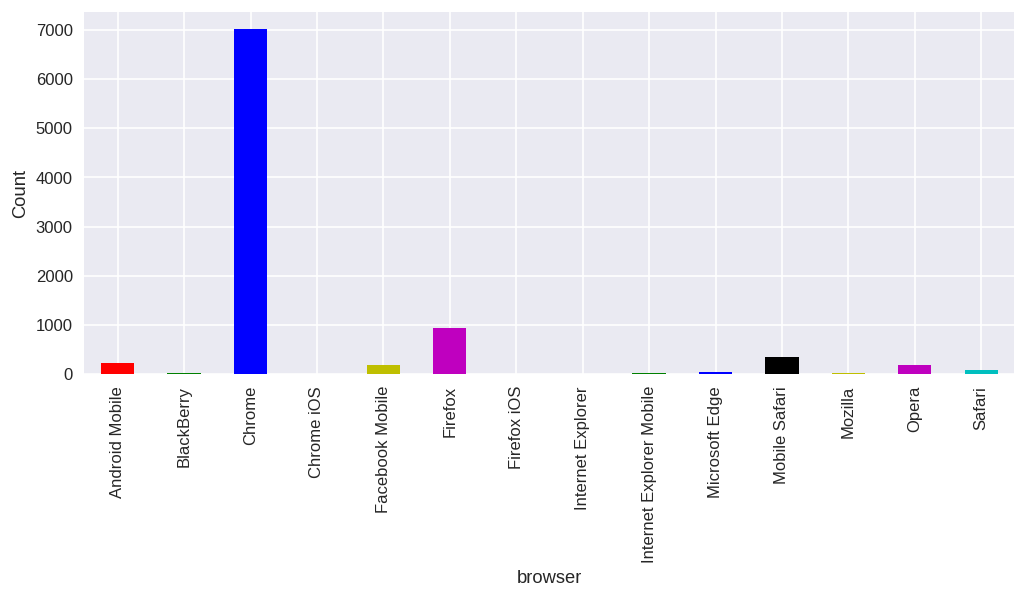

In [9]:
figbrowser, axbrowser = plt.subplots(figsize=(10,4), dpi=120)

my_colors = 'rgbkymc'

df_browser_unique.groupby(['browser']).size().plot(kind='bar', ax=axbrowser, color=my_colors)

plt.ylabel('Count')
plt.show()

In [10]:
# Get top 6 browser reader

df_browser_unique.groupby('browser').size().nlargest(6)

browser
Chrome             7015
Firefox             947
Mobile Safari       348
Android Mobile      234
Facebook Mobile     189
Opera               183
dtype: int64

## All unique user_id x Manufacturer

In [11]:
df_manufac_unique = df_filter[['user_id','manufacturer']].loc[(df_filter['manufacturer']!='N-A')].groupby(['user_id','manufacturer']).size().to_frame()
df_manufac_unique.index.names=['user_id','manufacturer']
df_manufac_unique.reset_index(inplace=True)
df_manufac_unique = df_manufac_unique.rename(columns={0: 'count'})

print df_manufac_unique['manufacturer'].describe(),"\n"
print df_manufac_unique.groupby('manufacturer').size()

count        3420
unique         77
top       samsung
freq          877
Name: manufacturer, dtype: object 

manufacturer
ADVAN        24
APLUS         1
ATTILA        1
Acer          9
Apple       629
Axioo         2
BBK           3
           ... 
iris510       2
kyocera       1
motorola      9
samsung     877
unknown       1
vivo         72
xiaomi        1
Length: 77, dtype: int64


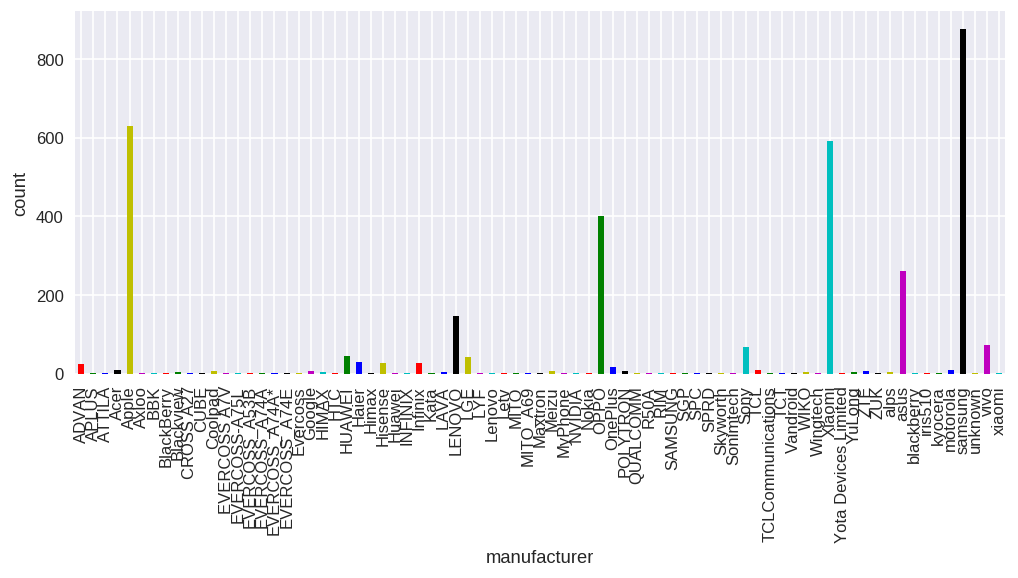

In [12]:
figmanuf, axmanuf = plt.subplots(figsize=(10,4), dpi=120)
my_colors = 'rgbkymc'

df_manufac_unique.groupby(['manufacturer']).size().plot(kind='bar', ax=axmanuf, color=my_colors)

plt.ylabel('count')
plt.show()

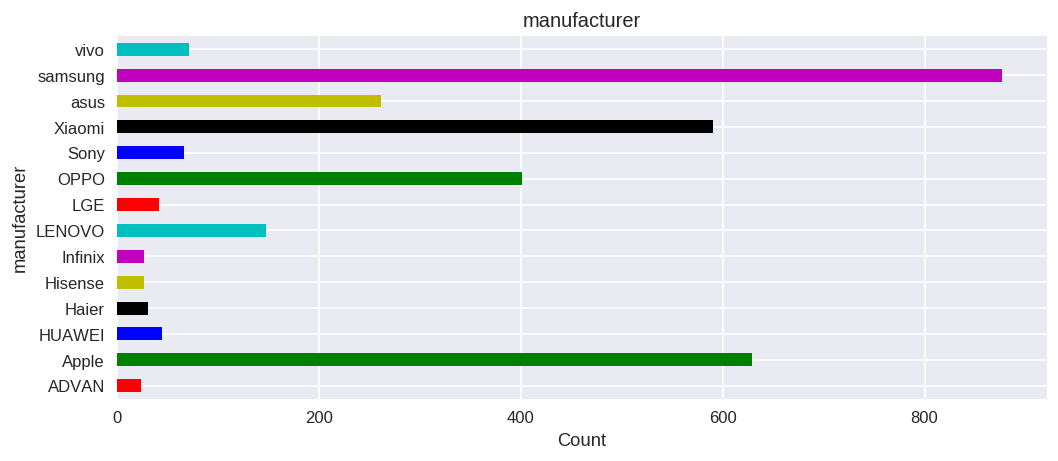

In [13]:
## View largest manufacturer users
figlargmanuf, axlargmanuf = plt.subplots(figsize=(10,4), dpi=120)
manufacfilter = df_manufac_unique[['manufacturer']].groupby(['manufacturer']).filter(lambda x: len(x) > 20)

manufacfilter.groupby(['manufacturer']).size().plot(kind='barh', stacked=True, \
                                                    title="manufacturer", ax=axlargmanuf, color=my_colors)

plt.xlabel('Count')
plt.show()